In [1]:
from maelzel.core import *
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel import tui
from maelzel.common import F
import logging
logging.getLogger('maelzel.scoring').setLevel('DEBUG')

[maelzel.scoring:quant.py:1334:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:2 2♩», «4C# 2:2.143 1/7♩», «4D 2.143:3.333 25/21♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (8,), gridError=0.04193059177308341 * 1.0 > minError=0.002
[maelzel.scoring:quant.py:908:quantizeBeatBinary:DEBUG] Skipping (9,), divPenalty=0.04 * 0.1 > minError=0.002
[maelzel.scoring:quant.py:908:quantizeBeatBinary:DEBUG] Skipping (11,), divPenalty=0.1 * 0.1 > minError=0.002
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (5, 1), gridError=0.08824915327867663 * 1.0 > minError=0.002
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (3, 1), gridError=0.05354623230801119 * 1.0 > minError=0.002
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (4, 1), gridError=0.04193059177308341 * 1.0 > minError=0.002
[maelzel.scoring:quant.py:934:quantizeBeatBinary:DEBUG] Skipping (7, 1), totalError=0.0073484692283495

Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 23.2ms)


error,div,snapped,slots,info
0.0020,"(7,)","[«4C# 0:0.143 1/7♩», «4D~ 0.143:1 6/7♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0554,"(6,)","[«4C# 0:0.167 1/6♩», «4D~ 0.167:1 5/6♩»]","[0, 1]","gridError=0.0535, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1127,"(5,)","[«4C# 0:0.2 1/5♩», «4D~ 0.2:1 4/5♩»]","[0, 1]","gridError=0.113, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 3 - 4 (dur: 1)
Best 2 divisions: (quantized in 215.1µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«~4D 0:0.333 1/3♩», «rest 0.333:1 2/3♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1022,"(5,)","[«~4D 0:0.4 2/5♩», «rest 0.4:1 3/5♩»]","[0, 2]","gridError=0.102, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4C~ 0:1 1♩»
)
    Node(1/1, 
  «~4C 1:2 1♩»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4C 0:2 2♩»
)
[maelzel.scoring:node.py:647:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(1/1, 
    «4C 0:2 2♩»
  )
  Node(7/4, 
    «4C# 2:2.143 1/7♩ 7/4»
    «4D~ 2.143:3 6/7♩ 7/4»
  )
  Node(3/2, 
    «~4D 3:3.333 1/3♩ 3/2»
    «rest 3.333:4 2/3♩ 3/2»
  )
) at 1
[maelzel.scoring:renderlily.py:1116:write:DEBUG] Rendering lilypond '/tmp/tmp4eltqikq.ly' to '/tmp/tmp4eltqikq.png'
[maelzel.scoring:renderlily.py:1129:write:DEBUG] Found crop file /tmp/tmp4eltqikq.cropped.png, using that as output



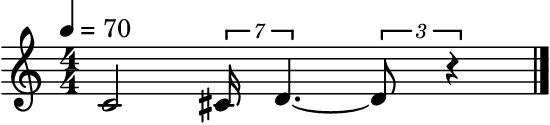

In [2]:
notes = [
    (60, F(2, 1)),
    (61, F(1, 7)),
    (62, F(6, 7)+F(1, 3))
]

struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)
qprofile = scoring.quant.QuantizationProfile.fromPreset('high')
qprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=qprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1334:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:2 2♩», «4C# 2:2.75 3/4♩», «4D# 2.75:3 1/4♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:908:quantizeBeatBinary:DEBUG] Skipping (9,), divPenalty=0.04 * 0.1 > minError=0.001
[maelzel.scoring:quant.py:908:quantizeBeatBinary:DEBUG] Skipping (11,), divPenalty=0.1 * 0.1 > minError=0.001
[maelzel.scoring:quant.py:908:quantizeBeatBinary:DEBUG] Skipping (15,), divPenalty=0.2024845673131659 * 0.1 > minError=0.001
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 3), gridError=0.1732862107887866 * 1.0 > minError=0.001
[maelzel.scoring:quant.py:908:quantizeBeatBinary:DEBUG] Skipping (1, 5), divPenalty=0.02 * 0.1 > minError=0.001
[maelzel.scoring:quant.py:934:quantizeBeatBinary:DEBUG] Skipping (1, 2), totalError=0.007071067811865475 > minError=0.001
[maelzel.scoring:quant.py:908:quantizeBeatBinary:DEBUG] Skipping (1, 7), divPenalty=0.02 * 0.1 > minError=0.001
[maelzel.scorin

Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 25.6ms)


error,div,snapped,slots,info
0.0010,"(4,)","[«4C# 0:0.75 3/4♩», «4D# 0.75:1 1/4♩»]","[0, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0891,"(7,)","[«4C# 0:0.714 5/7♩», «4D# 0.714:1 2/7♩»]","[0, 5]","gridError=0.088, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1733,"(3,)","[«4C# 0:0.667 2/3♩», «4D# 0.667:1 1/3♩»]","[0, 2]","gridError=0.173, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4C~ 0:1 1♩»
)
    Node(1/1, 
  «~4C 1:2 1♩»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4C 0:2 2♩»
)
[maelzel.scoring:quant.py:1611:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C 0:2 2♩»
)
Node(1/1, 
  «4C# 2:2.75 3/4♩»
  «4D# 2.75:3 1/4♩»
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1611:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C# 2:2.75 3/4♩»
  «4D# 2.75:3 1/4♩»
)
Node(1/1, 
  «rest 3:4 1♩»
)
----> no need to extend node over beat
[maelzel.scoring:node.py:647:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(1/1, 
    «4C 0:2 2♩»
  )
  Node(1/1, 
    «4C# 2:2.75 3/4♩»
    «4D# 2.75:3 1/4♩»
  )
  Node(1/1, 
    «rest 3:4 1♩»
  )
) at 1
[maelzel.scoring:renderlily.py:1116:write:DEBUG] Rendering lilypond '/tmp/tmp1a5ck8tg.ly' to '/tmp/tmp1a5ck8tg.png'
[maelzel.scoring:renderlily.py:112


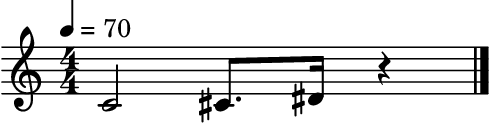

In [3]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct

notes = [
    (60, F(2, 1)),
    (61, F(3, 4)),
    (63, F(1, 4)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.debug = True
quantprofile.debugMaxDivisions = 20
quantprofile.rhythmComplexityWeight = 0.001
quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
r

[maelzel.scoring:quant.py:1334:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:2 2♩», «4C# 2:2.75 3/4♩», «4D# 2.75:2.792 1/24♩», «4E 2.792:3 5/24♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (11,), gridError=0.11375763180767479 * 1.0 > minError=0.07049476564334764
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 3), gridError=0.23968287887854567 * 1.0 > minError=0.06980919993130813
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 5), gridError=0.13026940730569272 * 1.0 > minError=0.06980919993130813
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 2), gridError=0.0877143665698259 * 1.0 > minError=0.06980919993130813
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 7), gridError=0.09465518604187771 * 1.0 > minError=0.06980919993130813
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 9), gridError=0.08885419469545926 * 1.0

Beat: 2 - 3 (dur: 1)
Best 8 divisions: (quantized in 34.0ms)


error,div,snapped,slots,info
0.0099,"(1, 1, 1, 6)","[«4C# 0:0.75 3/4♩», «4D# 0.75:0.792 1/24♩», «4E 0.792:1 5/24♩»]","[0, 3, 4]","gridError=0, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.03 (0.0003, divPenalty=0.03, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0106,"(1, 1, 8)","[«4C# 0:0.75 3/4♩», «4D# 0.75:0.792 1/24♩», «4E 0.792:1 5/24♩»]","[0, 4, 5]","gridError=0, rhythmComplexity=0.333 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0574,"(1, 8)","[«4C# 0:0.75 3/4♩», «4D# 0.75:0.812 1/16♩», «4E 0.812:1 3/16♩»]","[0, 5, 6]","gridError=0.0572, rhythmComplexity=0.149 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0698,"(15,)","[«4C# 0:0.733 11/15♩», «4D# 0.733:0.8 1/15♩», «4E 0.8:1 1/5♩»]","[0, 11, 12]","gridError=0.0661, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.002025, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0705,"(9,)","[«4C# 0:0.778 7/9♩», «4D# 0.778:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 24)}», «4E 0.778:1 2/9♩»]","[0, 7, 7]","gridError=0.0704, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0877,"(4,)","[«4C# 0:0.75 3/4♩», «4D# 0.75:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 24)}», «4E 0.75:1 1/4♩»]","[0, 3, 3]","gridError=0.0877, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2026,"(7,)","[«4C# 0:0.714 5/7♩», «4D# 0.714:0.857 1/7♩», «4E 0.857:1 1/7♩»]","[0, 5, 6]","gridError=0.202, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2397,"(6,)","[«4C# 0:0.667 2/3♩», «4D# 0.667:0.833 1/6♩», «4E 0.833:1 1/6♩»]","[0, 4, 5]","gridError=0.24, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4C~ 0:1 1♩»
)
    Node(1/1, 
  «~4C 1:2 1♩»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4C 0:2 2♩»
)
[maelzel.scoring:quant.py:1611:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C 0:2 2♩»
)
Node(1/1, 
  «4C# 2:2.75 3/4♩»
  Node(3/2, 
    «4D# 2.75:2.792 1/24♩ 3/2»
    «4E~ 2.792:2.833 1/24♩ 3/2»
    «~4E 2.833:3 1/6♩ 3/2»
  )
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1611:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C# 2:2.75 3/4♩»
  Node(3/2, 
    «4D# 2.75:2.792 1/24♩ 3/2»
    «4E~ 2.792:2.833 1/24♩ 3/2»
    «~4E 2.833:3 1/6♩ 3/2»
  )
)
Node(1/1, 
  «rest 3:4 1♩»
)
----> no need to extend node over beat
[maelzel.scoring:node.py:647:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(1/1, 
    «4C 0:2 2♩»
  )
  Node(1/1, 
    «4C# 2:2.75 3/4♩»
    Node(3/2, 
      «4D# 2.75:2.792 1/24♩ 3


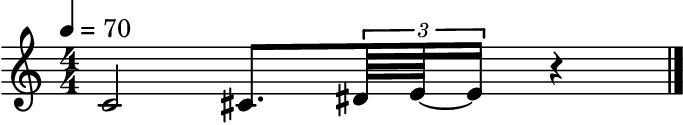

In [4]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct

notes = [
    (60, F(2, 1)),
    (61, F(3, 4)),
    (63, F(1, 4)*F(1, 6)),
    (64, F(1, 4)*F(5, 6)),
    # (62, F(3, 4))
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.debug = True
quantprofile.debugMaxDivisions = 20
quantprofile.rhythmComplexityWeight = 0.001
quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
r

[maelzel.scoring:quant.py:1334:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:0.133 2/15♩», «4C# 0.133:0.267 2/15♩», «4D 0.267:0.4 2/15♩», «4D# 0.4:0.533 2/15♩», «4E 0.533:0.667 2/15♩», «4F 0.667:1.333 2/3♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (9,), gridError=0.22531905327111643 * 1.0 > minError=0.19603001225655553
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (11,), gridError=0.24316288222191995 * 1.0 > minError=0.19603001225655553
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (5, 3), gridError=0.20049751858748066 * 1.0 > minError=0.010208928554075705
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (3, 5), gridError=0.3207162465990675 * 1.0 > minError=0.010208928554075705
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (4, 5), gridError=0.19673172035269532 * 1.0 > minError=0.010208928554075705
[maelzel.scoring:quant.py:917:quantizeBeatBina

Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 441.9ms)


error,div,snapped,slots,info
0.0030,"(5, 5, 1)","[«4C 0:0.133 2/15♩», «4C# 0.133:0.267 2/15♩», «4D 0.267:0.4 2/15♩», «4D# 0.4:0.533 2/15♩», «4E 0.533:0.667 2/15♩», «4F~ 0.667:1 1/3♩»]","[0, 2, 4, 6, 8, 10]","gridError=0, rhythmComplexity=0.0745 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0424 (8.485e-05, divPenalty=0.0283, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0102,"(15,)","[«4C 0:0.133 2/15♩», «4C# 0.133:0.267 2/15♩», «4D 0.267:0.4 2/15♩», «4D# 0.4:0.533 2/15♩», «4E 0.533:0.667 2/15♩», «4F~ 0.667:1 1/3♩»]","[0, 2, 4, 6, 8, 10]","gridError=0, rhythmComplexity=0.149 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.000405, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1960,"(8,)","[«4C 0:0.125 1/8♩», «4C# 0.125:0.25 1/8♩», «4D 0.25:0.375 1/8♩», «4D# 0.375:0.5 1/8♩», «4E 0.5:0.625 1/8♩», «4F~ 0.625:1 3/8♩»]","[0, 1, 2, 3, 4, 5]","gridError=0.196, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (2e-05, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2181,"(7,)","[«4C 0:0.143 1/7♩», «4C# 0.143:0.286 1/7♩», «4D 0.286:0.429 1/7♩», «4D# 0.429:0.571 1/7♩», «4E 0.571:0.714 1/7♩», «4F~ 0.714:1 2/7♩»]","[0, 1, 2, 3, 4, 5]","gridError=0.218, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2728,"(6,)","[«4C 0:0.167 1/6♩», «4C# 0.167:0.333 1/6♩», «4D 0.333:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(2, 15)}», «4D# 0.333:0.5 1/6♩», «4E 0.5:0.667 1/6♩», «4F~ 0.667:1 1/3♩»]","[0, 1, 2, 2, 3, 4]","gridError=0.273, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 1 divisions: (quantized in 188.6µs)


error,div,snapped,slots,info
0,"(3,)","[«~4F 0:0.333 1/3♩», «rest 0.333:1 2/3♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(5/4, 
  «4C 0:0.133 2/15♩ 3/2,5/4»
  «4C# 0.133:0.267 2/15♩ 3/2,5/4»
  «4D~ 0.267:0.333 1/15♩ 3/2,5/4»
)
    Node(5/4, 
  «~4D 0.333:0.4 1/15♩ 3/2,5/4»
  «4D# 0.4:0.533 2/15♩ 3/2,5/4»
  «4E 0.533:0.667 2/15♩ 3/2,5/4»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(5/4, 
  «4C 0:0.133 2/15♩ 3/2,5/4»
  «4C# 0.133:0.267 2/15♩ 3/2,5/4»
  «4D 0.267:0.4 2/15♩ 3/2,5/4»
  «4D# 0.4:0.533 2/15♩ 3/2,5/4»
  «4E 0.533:0.667 2/15♩ 3/2,5/4»
)
[maelzel.scoring:quant.py:1611:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  Node(5/4, 
    «4C 0:0.133 2/15♩ 3/2,5/4»
    «4C# 0.133:0.267 2/15♩ 3/2,5/4»
    «4D 0.267:0.4 2/15♩ 3/2,5/4»
    «4D# 0.4:0.533 2/15♩ 3/2,5/4»
    «4E 0.533:0.667 2/15♩ 3/2,5/4»
  )
  «4F~ 0.667:1 1/3♩ 3/2»
)
Node(3/2, 
  «~4F 1:1.333 1/3♩ 3/2»
  «rest 1.333:2 2/3♩ 3/2»
)
----> Cannot merge nested tuples 1
[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Node


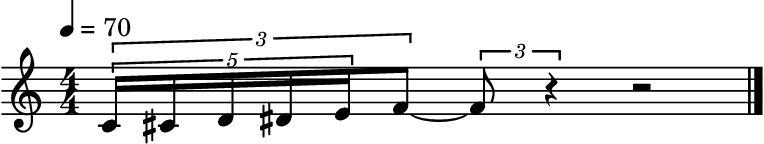

In [5]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

notes = [
    (60, F(2, 3)*F(1, 5)),
    (61, F(2, 3)*F(1, 5)),
    (62, F(2, 3)*F(1, 5)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2,3)),
    #(60, F(2, 7)),
    #(61, F(3, 7)),
    #(62, F(4, 7))
    
    
    ]

struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.rhythmComplexityWeight  = 0.001
quantprofile.debug=True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r.write('~/tmp/bigtriplet.ly')
r

[maelzel.scoring:quant.py:1334:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C# 0:0.6 3/5♩», «4E 0.6:0.7 1/10♩», «4F 0.7:0.8 1/10♩», «4F# 0.8:0.9 1/10♩», «4G 0.9:1 1/10♩», «4C 1:1.2 1/5♩», «4D 1.2:1.533 1/3♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:934:quantizeBeatBinary:DEBUG] Skipping (15,), totalError=0.15947483323468356 > minError=0.15731357043948346
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 3), gridError=0.2899795441844549 * 1.0 > minError=0.15731357043948346
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 4), gridError=0.21454452017703698 * 1.0 > minError=0.010954451150103323
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 6), gridError=0.1789974848004854 * 1.0 > minError=0.010954451150103323
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 7), gridError=0.17723584915066454 * 1.0 > minError=0.010954451150103323
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEB

Beat: 0 - 1 (dur: 1)
Best 7 divisions: (quantized in 125.1ms)


error,div,snapped,slots,info
0.0063,"(1, 1, 1, 2, 2)","[«4C# 0:0.6 3/5♩», «4E 0.6:0.7 1/10♩», «4F 0.7:0.8 1/10♩», «4F# 0.8:0.9 1/10♩», «4G 0.9:1 1/10♩»]","[0, 3, 4, 5, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0110,"(1, 5)","[«4C# 0:0.6 3/5♩», «4E 0.6:0.7 1/10♩», «4F 0.7:0.8 1/10♩», «4F# 0.8:0.9 1/10♩», «4G 0.9:1 1/10♩»]","[0, 2, 3, 4, 5]","gridError=0, rhythmComplexity=0.0894 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1573,"(11,)","[«4C# 0:0.636 7/11♩», «4E 0.636:0.727 1/11♩», «4F 0.727:0.818 1/11♩», «4F# 0.818:0.909 1/11♩», «4G 0.909:1 1/11♩»]","[0, 7, 8, 9, 10]","gridError=0.154, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.01, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1823,"(9,)","[«4C# 0:0.556 5/9♩», «4E 0.556:0.667 1/9♩», «4F 0.667:0.778 1/9♩», «4F# 0.778:0.889 1/9♩», «4G 0.889:1 1/9♩»]","[0, 5, 6, 7, 8]","gridError=0.181, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.04 (0.004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2153,"(8,)","[«4C# 0:0.625 5/8♩», «4E 0.625:0.75 1/8♩», «4F 0.75:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 10)}», «4F# 0.75:0.875 1/8♩», «4G 0.875:1 1/8♩»]","[0, 5, 6, 6, 7]","gridError=0.215, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2223,"(7,)","[«4C# 0:0.571 4/7♩», «4E 0.571:0.714 1/7♩», «4F 0.714:0.857 1/7♩», «4F# 0.857:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 10)}», «4G 0.857:1 1/7♩»]","[0, 4, 5, 6, 6]","gridError=0.222, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2900,"(6,)","[«4C# 0:0.667 2/3♩», «4E 0.667:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 10)}», «4F 0.667:0.833 1/6♩», «4F# 0.833:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 10)}», «4G 0.833:1 1/6♩»]","[0, 4, 4, 5, 5]","gridError=0.29, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (7,), gridError=0.17635734724753555 * 1.0 > minError=0.10300141362845067
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (4,), gridError=0.15848931924611134 * 1.0 > minError=0.10300141362845067
[maelzel.scoring:quant.py:934:quantizeBeatBinary:DEBUG] Skipping (11,), totalError=0.08286757858515804 > minError=0.07539620289407264
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (3, 1), gridError=0.10280705816946219 * 1.0 > minError=0.06740604818968841
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (2, 1), gridError=0.15848931924611134 * 1.0 > minError=0.06740604818968841
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (7, 1), gridError=0.09486895381217367 * 1.0 > minError=0.06740604818968841
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (8, 1), gridError=0.07873686071872314 * 1.0 > minError=0.06740604818968841
[maelzel.scoring:quant.py:934:

Beat: 1 - 2 (dur: 1)
Best 6 divisions: (quantized in 131.7ms)


error,div,snapped,slots,info
0.0327,"(5, 5, 1)","[«4C 0:0.2 1/5♩», «4D 0.2:0.533 1/3♩», «rest 0.533:1 7/15♩»]","[0, 3, 8]","gridError=0, rhythmComplexity=0.298 (numNotesAcrossSubdivs=2, numTies=0), divPenalty=0.0424 (0.004243, divPenalty=0.0283, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0536,"(5, 9)","[«4C 0:0.2 1/5♩», «4D 0.2:0.556 16/45♩», «rest 0.556:1 4/9♩»]","[0, 2, 6]","gridError=0.0485, rhythmComplexity=0.149 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0548 (0.005477, divPenalty=0.0447, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0674,"(5, 1)","[«4C 0:0.2 1/5♩», «4D 0.2:0.5 3/10♩», «rest 0.5:1 1/2♩»]","[0, 2, 5]","gridError=0.0671, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0706,"(15,)","[«4C 0:0.2 1/5♩», «4D 0.2:0.533 1/3♩», «rest 0.533:1 7/15♩»]","[0, 3, 8]","gridError=0, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.02025, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0754,"(9,)","[«4C 0:0.222 2/9♩», «4D 0.222:0.556 1/3♩», «rest 0.556:1 4/9♩»]","[0, 2, 5]","gridError=0.0743, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1030,"(6,)","[«4C 0:0.167 1/6♩», «4D 0.167:0.5 1/3♩», «rest 0.5:1 1/2♩»]","[0, 1, 3]","gridError=0.103, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4E 0.6:0.7 1/10♩ 5/4»
  «4F 0.7:0.8 1/10♩ 5/4»
)
    Node(1/1, 
  «4F# 0.8:0.9 1/10♩ 5/4»
  «4G 0.9:1 1/10♩ 5/4»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4E 0.6:0.7 1/10♩ 5/4»
  «4F 0.7:0.8 1/10♩ 5/4»
  «4F# 0.8:0.9 1/10♩ 5/4»
  «4G 0.9:1 1/10♩ 5/4»
)
[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(5/4, 
  «4C 1:1.2 1/5♩ 3/2,5/4»
  «4D~ 1.2:1.333 2/15♩ 3/2,5/4»
)
    Node(5/4, 
  «~4D 1.333:1.533 1/5♩ 3/2,5/4»
  «rest 1.533:1.667 2/15♩ 3/2,5/4»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(5/4, 
  «4C 1:1.2 1/5♩ 3/2,5/4»
  «4D~ 1.2:1.333 2/15♩ 3/2,5/4»
  «~4D 1.333:1.533 1/5♩ 3/2,5/4»
  «rest 1.533:1.667 2/15♩ 3/2,5/4»
)
[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1


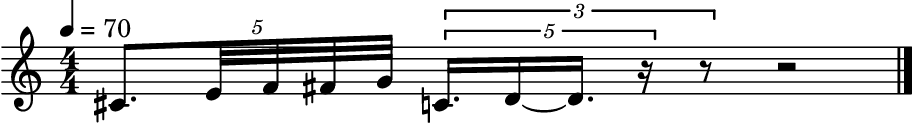

In [6]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

notes = [
    (61, F(1, 2)+F(1,10)),
    (64, F(1, 10)),
    (65, F(1, 10)),
    (66, F(1, 10)),
    (67, F(1, 10)),
    
    (60, F(1, 5)),
    (62, F(1, 3)),
    
]
struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', nestedTuplets=True)
quantprofile.divisionErrorWeight = 0.1
quantprofile.rhythmComplexityWeight = 0.01
quantprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1334:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C# 0:0.667 2/3♩», «4E 0.667:1.333 2/3♩», «4F 1.333:1.667 1/3♩», «4F+ 1.667:2 1/3♩»]). Filling gaps with silences


Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 291.3µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«4C# 0:0.667 2/3♩», «4E~ 0.667:1 1/3♩»]","[0, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1285,"(5,)","[«4C# 0:0.6 3/5♩», «4E~ 0.6:1 2/5♩»]","[0, 3]","gridError=0.128, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 2 divisions: (quantized in 180.2µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«~4E 0:0.333 1/3♩», «4F 0.333:0.667 1/3♩», «4F+ 0.667:1 1/3♩»]","[0, 1, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2316,"(5,)","[«~4E 0:0.4 2/5♩», «4F 0.4:0.6 1/5♩», «4F+ 0.6:1 2/5♩»]","[0, 2, 3]","gridError=0.232, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4E~ 0.667:1 1/3♩ 3/2»
)
    Node(3/2, 
  «~4E 1:1.333 1/3♩ 3/2»
  «4F 1.333:1.667 1/3♩ 3/2»
  «4F+ 1.667:2 1/3♩ 3/2»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4E 0.667:1.333 2/3♩ 3/2»
  «4F 1.333:1.667 1/3♩ 3/2»
  «4F+ 1.667:2 1/3♩ 3/2»
)
[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 2:4 2♩»
)
[maelzel.scoring:node.py:647:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(3/2, 
    «4C# 0:0.667 2/3♩ 3/2»
    «4E 0.667:1.333 2/3♩ 3/2»
    «4F 1.333:1.667 1/3♩ 3/2»
    «4F+ 1.667:2 1/3♩ 3/2»
  )
  Node(1/1, 
    «rest 2:4 2♩»
  )
) at 1
[maelzel.scoring:node.py:647:_splitUnnecessaryNodes:DEBUG] Did not spl


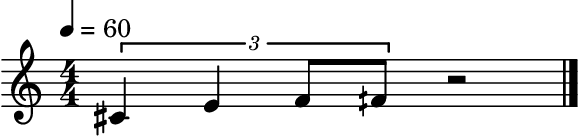

In [7]:
from maelzel import scoring
from maelzel.common import F
from maelzel.scorestruct import ScoreStruct

notes = [
    (61, F(2, 3)),
    (64, F(2, 3)),
    (65, F(1, 3)),
    (65.5, F(1, 3)),
]

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)

struct = ScoreStruct(timesig='4/4', tempo=60)

quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', divisionErrorWeight=0.05)
quantprofile.debug= True

qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4E~ 0.667:1 1/3♩ 3/2»
)
    Node(3/2, 
  «~4E 1:1.333 1/3♩ 3/2»
  «4F 1.333:1.667 1/3♩ 3/2»
  «4F+ 1.667:2 1/3♩ 3/2»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4E 0.667:1.333 2/3♩ 3/2»
  «4F 1.333:1.667 1/3♩ 3/2»
  «4F+ 1.667:2 1/3♩ 3/2»
)
[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 2:4 2♩»
)
[maelzel.scoring:node.py:647:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(3/2, 
    «4C# 0:0.667 2/3♩ 3/2»
    «4E 0.667:1.333 2/3♩ 3/2»
    «4F 1.333:1.667 1/3♩ 3/2»
    «4F+ 1.667:2 1/3♩ 3/2»
  )
  Node(1/1, 
    «rest 2:4 2♩»
  )
) at 1
[maelzel.scoring:node.py:647:_splitUnnecessaryNodes:DEBUG] Did not spl

Score(1 voices)
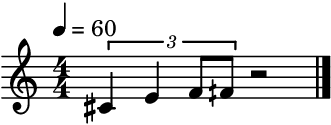

In [8]:
sco = r.quantizedScore.toCoreScore()
sco

# TODO

In [9]:
import logging
logging.basicConfig(level="DEBUG")
logging.getLogger("maelzel.scoring").setLevel(logging.DEBUG)

[maelzel.scoring:quant.py:1334:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:0.667 2/3♩», «4D# 0.667:0.8 2/15♩», «4E 0.8:0.933 2/15♩», «4F 0.933:1.133 1/5♩», «4F# 1.133:1.267 2/15♩», «4C# 1.267:1.933 2/3♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:1611:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  «4C 0:0.667 2/3♩ 3/2»
  Node(5/4, 
    «4D# 0.667:0.8 2/15♩ 3/2,5/4»
    «4E 0.8:0.933 2/15♩ 3/2,5/4»
    «4F~ 0.933:1 1/15♩ 3/2,5/4»
  )
)
Node(3/2, 
  Node(5/4, 
    «~4F 1:1.133 2/15♩ 3/2,5/4»
    «4F# 1.133:1.267 2/15♩ 3/2,5/4»
    «4C#~ 1.267:1.333 1/15♩ 3/2,5/4»
  )
  «~4C#~ 1.333:1.667 1/3♩ 3/2»
  Node(5/4, 
    «~4C# 1.667:1.933 4/15♩ 3/2,5/4»
    «rest 1.933:2 1/15♩ 3/2,5/4»
  )
)
----> complex nested tuplets cannot merge: (3, 5)
[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node


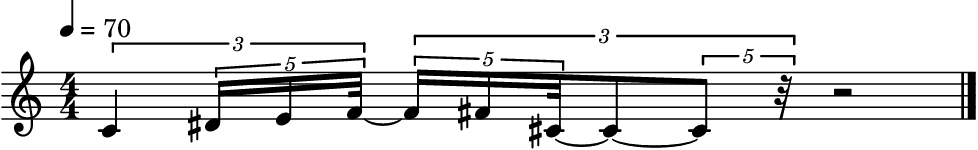

In [10]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2, 3)*F(3, 10)),
    (66, F(2, 3)*F(1, 5)),
    # (67, F(2, 3)*F(1, 5)),  
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.debug = False

# quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

[maelzel.scoring:quant.py:1334:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:0.667 2/3♩», «4D# 0.667:0.733 1/15♩», «4E 0.733:0.8 1/15♩», «4F 0.8:1 1/5♩», «4F# 1:1.067 1/15♩», «4D# 1.067:1.133 1/15♩», «4E 1.133:1.2 1/15♩», «4F 1.2:1.333 2/15♩», «4C# 1.333:2 2/3♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (7,), gridError=0.20643820375256142 * 1.0 > minError=0.1898072551567961
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (8,), gridError=0.19539185161600903 * 1.0 > minError=0.1898072551567961
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (11,), gridError=0.11871495348741289 * 1.0 > minError=0.11052139089580214
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 3), gridError=0.18980514774409332 * 1.0 > minError=0.009327379053088817
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (1, 5), gridError=0.1160126842335892 * 1.0 > minError=0.00932737905308

Beat: 0 - 1 (dur: 1)
Best 4 divisions: (quantized in 57.7ms)


error,div,snapped,slots,info
0.0017,"(1, 1, 5)","[«4C 0:0.667 2/3♩», «4D# 0.667:0.733 1/15♩», «4E 0.733:0.8 1/15♩», «4F 0.8:1 1/5♩»]","[0, 2, 3, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0093,"(15,)","[«4C 0:0.667 2/3♩», «4D# 0.667:0.733 1/15♩», «4E 0.733:0.8 1/15♩», «4F 0.8:1 1/5♩»]","[0, 10, 11, 12]","gridError=0, rhythmComplexity=0.224 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.000405, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1105,"(9,)","[«4C 0:0.667 2/3♩», «4D# 0.667:0.778 1/9♩», «4E 0.778:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «4F 0.778:1 2/9♩»]","[0, 6, 7, 7]","gridError=0.111, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1898,"(6,)","[«4C 0:0.667 2/3♩», «4D# 0.667:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «4E 0.667:0.833 1/6♩», «4F 0.833:1 1/6♩»]","[0, 4, 4, 5]","gridError=0.19, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (7,), gridError=0.2742267376400073 * 1.0 > minError=0.21705060887870725
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (8,), gridError=0.22810850583212117 * 1.0 > minError=0.21705060887870725
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (11,), gridError=0.19083370858553728 * 1.0 > minError=0.15017789521994934
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (5, 1), gridError=0.17405860122637887 * 1.0 > minError=0.009230384607371462
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (3, 1), gridError=0.21704876598271078 * 1.0 > minError=0.009230384607371462
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (4, 1), gridError=0.22810850583212117 * 1.0 > minError=0.009230384607371462
[maelzel.scoring:quant.py:917:quantizeBeatBinary:DEBUG] Skipping (6, 1), gridError=0.13363777733523685 * 1.0 > minError=0.009230384607371462
[maelzel.scoring:quant

Beat: 1 - 2 (dur: 1)
Best 4 divisions: (quantized in 76.5ms)


error,div,snapped,slots,info
0.0017,"(5, 1, 1)","[«4F# 0:0.067 1/15♩», «4D# 0.067:0.133 1/15♩», «4E 0.133:0.2 1/15♩», «4F 0.2:0.333 2/15♩», «4C# 0.333:1 2/3♩»]","[0, 1, 2, 3, 5]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0092,"(15,)","[«4F# 0:0.067 1/15♩», «4D# 0.067:0.133 1/15♩», «4E 0.133:0.2 1/15♩», «4F 0.2:0.333 2/15♩», «4C# 0.333:1 2/3♩»]","[0, 1, 2, 3, 5]","gridError=0, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.000405, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1502,"(9,)","[«4F# 0:0.111 1/9♩», «4D# 0.111:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «4E 0.111:0.222 1/9♩», «4F 0.222:0.333 1/9♩», «4C# 0.333:1 2/3♩»]","[0, 1, 1, 2, 3]","gridError=0.15, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2170,"(6,)","[«4F# 0:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «4D# 0:0.167 1/6♩», «4E 0.167:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «4F 0.167:0.333 1/6♩», «4C# 0.333:1 2/3♩»]","[0, 0, 1, 1, 2]","gridError=0.217, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1611:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  «4C 0:0.667 2/3♩ 3/2»
  Node(5/4, 
    «4D# 0.667:0.733 1/15♩ 3/2,5/4»
    «4E 0.733:0.8 1/15♩ 3/2,5/4»
    «4F 0.8:1 1/5♩ 3/2,5/4»
  )
)
Node(3/2, 
  Node(5/4, 
    «4F# 1:1.067 1/15♩ 3/2,5/4»
    «4D# 1.067:1.133 1/15♩ 3/2,5/4»
    «4E 1.133:1.2 1/15♩ 3/2,5/4»
    «4F 1.2:1.333 2/15♩ 3/2,5/4»
  )
  «4C# 1.333:2 2/3♩ 3/2»
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1605:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1608:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 2:4 2♩»
)
[maelzel.scoring:node.py:647:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(3/2, 
    «4C 0:0.667 2/3♩ 3/2»
    Node(5/4, 
      «4D# 0.667:0.733 1/15♩ 3/2,5/4»
      «4E 0.733:0.8 1/15♩ 3/2,5/4»
      «4F 0.8:1 1/5♩ 3/2,5/4»
    )
  )
  Node(3/2, 
    Node(5/4, 
      «4F# 1:1.067 1/1


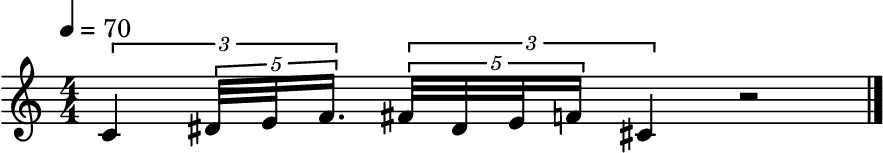

In [11]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 10)),
    (64, F(2, 3)*F(1, 10)),
    (65, F(2, 3)*F(3, 10)),
    
    (66, F(2, 3)*F(1, 10)),
    (63, F(2, 3)*F(1, 10)),
    (64, F(2, 3)*F(1, 10)),
    (65, F(2, 3)*F(2, 10)),
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
#quantprofile.rhythmComplexityWeight = 0.001
#quantprofile.divisionErrorWeight = 0.01
quantprofile.minBeatFractionAcrossBeats = F(1, 8)
quantprofile.minSymbolicDurationAcrossBeat = F(1, 3)

qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

Beat: 0 - 1 (dur: 1)
Best 8 divisions: (quantized in 83.2ms)


error,div,snapped,slots,info
0.0011,"(8, 8)","[«4C 0:0.25 1/4♩», «4D# 0.25:0.438 3/16♩», «4E 0.438:0.625 3/16♩», «4F 0.625:0.812 3/16♩», «4F# 0.812:1 3/16♩»]","[0, 4, 7, 10, 13]","gridError=0, rhythmComplexity=0.0894 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0141 (2.828e-05, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0572,"(6, 8)","[«4C 0:0.25 1/4♩», «4D# 0.25:0.417 1/6♩», «4E 0.417:0.625 5/24♩», «4F 0.625:0.812 3/16♩», «4F# 0.812:1 3/16♩»]","[0, 3, 5, 8, 11]","gridError=0.0572, rhythmComplexity=0.2 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.0224 (4.472e-05, divPenalty=0.0224, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0817,"(8, 5)","[«4C 0:0.25 1/4♩», «4D# 0.25:0.438 3/16♩», «4E 0.438:0.6 13/80♩», «4F 0.6:0.8 1/5♩», «4F# 0.8:1 1/5♩»]","[0, 4, 7, 9, 11]","gridError=0.0817, rhythmComplexity=0.2 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.0224 (4.472e-05, divPenalty=0.0224, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1059,"(11,)","[«4C 0:0.273 3/11♩», «4D# 0.273:0.455 2/11♩», «4E 0.455:0.636 2/11♩», «4F 0.636:0.818 2/11♩», «4F# 0.818:1 2/11♩»]","[0, 3, 5, 7, 9]","gridError=0.106, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2134,"(9,)","[«4C 0:0.222 2/9♩», «4D# 0.222:0.444 2/9♩», «4E 0.444:0.667 2/9♩», «4F 0.667:0.778 1/9♩», «4F# 0.778:1 2/9♩»]","[0, 2, 4, 6, 7]","gridError=0.213, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2397,"(8,)","[«4C 0:0.25 1/4♩», «4D# 0.25:0.375 1/8♩», «4E 0.375:0.625 1/4♩», «4F 0.625:0.75 1/8♩», «4F# 0.75:1 1/4♩»]","[0, 2, 3, 5, 6]","gridError=0.24, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (2e-05, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2609,"(7,)","[«4C 0:0.286 2/7♩», «4D# 0.286:0.429 1/7♩», «4E 0.429:0.571 1/7♩», «4F 0.571:0.857 2/7♩», «4F# 0.857:1 1/7♩»]","[0, 2, 3, 4, 6]","gridError=0.261, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2992,"(6,)","[«4C 0:0.333 1/3♩», «4D# 0.333:0.5 1/6♩», «4E 0.5:0.667 1/6♩», «4F 0.667:0.833 1/6♩», «4F# 0.833:1 1/6♩»]","[0, 2, 3, 4, 5]","gridError=0.299, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 3 divisions: (quantized in 19.0ms)


error,div,snapped,slots,info
0.0050,"(8, 1)","[«4G 0:0.188 3/16♩», «4C~ 0.188:1 13/16♩»]","[0, 3]","gridError=0, rhythmComplexity=0.5 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.01 (2e-05, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0212,"(11,)","[«4G 0:0.182 2/11♩», «4C~ 0.182:1 9/11♩»]","[0, 2]","gridError=0.0202, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0573,"(6,)","[«4G 0:0.167 1/6♩», «4C~ 0.167:1 5/6♩»]","[0, 1]","gridError=0.0572, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 23.3ms)


error,div,snapped,slots,info
0.0023,"(8, 1)","[«~4C 0:0.188 3/16♩», «rest 0.188:1 13/16♩»]","[0, 3]","gridError=0, rhythmComplexity=0.224 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.01 (2e-05, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0175,"(11,)","[«~4C 0:0.182 2/11♩», «rest 0.182:1 9/11♩»]","[0, 2]","gridError=0.0163, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0463,"(6,)","[«~4C 0:0.167 1/6♩», «rest 0.167:1 5/6♩»]","[0, 1]","gridError=0.0461, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



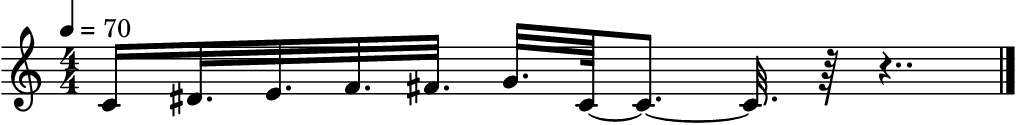

In [1]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(1, 4)),
    (63, F(1, 4)*F(3, 4)),
    (64, F(1, 4)*F(3, 4)),
    (65, F(1, 4)*F(3, 4)),
    (66, F(1, 4)*F(3, 4)),
    (67, F(1, 4)*F(3, 4)),
    (60, F(1)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

UnquantizedPart #0:
  Measure #0
    Timesig: 4/4(quarter=70)
    Node ratio: 1/1, offset=0, end=4
      Node ratio: 1/1, offset=0, end=1
        «4C~ 0:0.25 1/4♩ spanners=[Slur(kind=start, linetype=solid, nestingLevel=1,
          uuid=60vmpdlg)]»
        «4Cgliss 0.25:0.75 1/2♩»
        «4F 0.75:1 1/4♩ spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=60vmpdlg)]»
      Node ratio: 1/1, offset=1, end=4
        «rest 1:4 3♩»



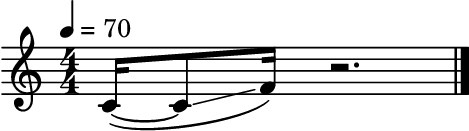

In [2]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(1, 4), tiedNext=True),
    makeNote(60, F(1, 4), tiedNext=True, gliss=True),
    makeNote(60, F(1, 4), tiedPrev=True),
    makeNote(65, F(1, 4))
]

notes[0].addSpanner(spanner.Slur(), notes[-1])
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
score.dump()
r # .write('~/tmp/quant.ly')

Meas. Index,Timesig,Tempo (quarter note),Label,Rehearsal,Barline
0,"7/8([Fraction(1, 1), Fraction(3, 2), Fraction(1, 1)])",52,,,
1,7/8,,,,
...,,,,,


Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 14.8ms)


error,div,snapped,slots,info
0.0010,"(8,)","[«4D 0:0.375 3/8♩», «4C 0.375:0.75 3/8♩», «4D~ 0.75:1 1/4♩»]","[0, 3, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1259,"(5,)","[«4D 0:0.4 2/5♩», «4C 0.4:0.8 2/5♩», «4D~ 0.8:1 1/5♩»]","[0, 2, 4]","gridError=0.126, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 3/2 (dur: 1/2)
Best 3 divisions: (quantized in 2.6ms)


error,div,snapped,slots,info
0.0010,"(4,)","[«~4D 0:0.125 1/8♩», «4C 0.125:0.5 3/8♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0769,"(7,)","[«~4D 0:0.143 1/7♩», «4C 0.143:0.5 5/14♩»]","[0, 2]","gridError=0.0756, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1006,"(5,)","[«~4D 0:0.1 1/10♩», «4C 0.1:0.5 2/5♩»]","[0, 1]","gridError=0.101, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 3/2 - 5/2 (dur: 1)
Best 12 divisions: (quantized in 62.7ms)


error,div,snapped,slots,info
0.0046,"(5, 5, 2)","[«4C# 0:0.133 2/15♩», «4D 0.133:0.267 2/15♩», «4D# 0.267:0.4 2/15♩», «4E 0.4:0.533 2/15♩», «4F 0.533:0.667 2/15♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 2, 4, 6, 8, 10, 11]","gridError=0, rhythmComplexity=0.0639 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0412 (0.0004123, divPenalty=0.0283, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0715,"(5, 5, 5)","[«4C# 0:0.133 2/15♩», «4D 0.133:0.267 2/15♩», «4D# 0.267:0.4 2/15♩», «4E 0.4:0.533 2/15♩», «4F 0.533:0.667 2/15♩», «4F# 0.667:0.8 2/15♩», «4G 0.8:1 1/5♩»]","[0, 2, 4, 6, 8, 10, 12]","gridError=0.0713, rhythmComplexity=0.0639 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0458 (0.0004583, divPenalty=0.0346, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0726,"(11, 9)","[«4C# 0:0.136 3/22♩», «4D 0.136:0.273 3/22♩», «4D# 0.273:0.409 3/22♩», «4E 0.409:0.556 0.146♩», «4F 0.556:0.667 1/9♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 3, 6, 9, 12, 14, 17]","gridError=0.0717, rhythmComplexity=0.143 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.108 (0.001077, divPenalty=0.108, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0972,"(11, 3)","[«4C# 0:0.136 3/22♩», «4D 0.136:0.273 3/22♩», «4D# 0.273:0.409 3/22♩», «4E 0.409:0.5 1/11♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 3, 6, 9, 11, 12, 13]","gridError=0.0966, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.001, divPenalty=0.1, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1211,"(7, 9)","[«4C# 0:0.143 1/7♩», «4D 0.143:0.286 1/7♩», «4D# 0.286:0.429 1/7♩», «4E 0.429:0.556 8/63♩», «4F 0.556:0.667 1/9♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 2, 4, 6, 8, 10, 13]","gridError=0.121, rhythmComplexity=0.0639 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0447 (0.0004472, divPenalty=0.0447, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1273,"(4, 3)","[«4C# 0:0.125 1/8♩», «4D 0.125:0.25 1/8♩», «4D# 0.25:0.375 1/8♩», «4E 0.375:0.5 1/8♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 1, 2, 3, 4, 5, 6]","gridError=0.127, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1485,"(7, 3)","[«4C# 0:0.143 1/7♩», «4D 0.143:0.286 1/7♩», «4D# 0.286:0.429 1/7♩», «4E 0.429:0.5 1/14♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 2, 4, 6, 7, 8, 9]","gridError=0.149, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1813,"(6, 3)","[«4C# 0:0.167 1/6♩», «4D 0.167:0.25 1/12♩», «4D# 0.25:0.417 1/6♩», «4E 0.417:0.5 1/12♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 2, 3, 5, 6, 7, 8]","gridError=0.181, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1814,"(5, 3)","[«4C# 0:0.1 1/10♩», «4D 0.1:0.3 1/5♩», «4D# 0.3:0.4 1/10♩», «4E 0.4:0.5 1/10♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 1, 3, 4, 5, 6, 7]","gridError=0.181, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.2240,"(7,)","[«4C# 0:0.143 1/7♩», «4D 0.143:0.286 1/7♩», «4D# 0.286:0.429 1/7♩», «4E 0.429:0.571 1/7♩», «4F 0.571:0.714 1/7♩», «4F# 0.714:0.857 1/7♩», «4G 0.857:1 1/7♩»]","[0, 1, 2, 3, 4, 5, 6]","gridError=0.224, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 6 divisions: (quantized in 44.5ms)


error,div,snapped,slots,info
0.0372,"(4, 11)","[«~4D 0:0.125 1/8♩», «4C 0.125:0.5 3/8♩», «4C# 0.5:0.636 3/22♩», «4D 0.636:0.773 3/22♩», «4D# 0.773:0.909 3/22♩», «4E~ 0.909:1 1/11♩»]","[0, 1, 4, 7, 10, 13]","gridError=0.0358, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.001005, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0703,"(7, 11)","[«~4D 0:0.143 1/7♩», «4C 0.143:0.5 5/14♩», «4C# 0.5:0.636 3/22♩», «4D 0.636:0.773 3/22♩», «4D# 0.773:0.909 3/22♩», «4E~ 0.909:1 1/11♩»]","[0, 2, 7, 10, 13, 16]","gridError=0.0694, rhythmComplexity=0.149 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.102 (0.00102, divPenalty=0.102, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0828,"(5, 11)","[«~4D 0:0.1 1/10♩», «4C 0.1:0.5 2/5♩», «4C# 0.5:0.636 3/22♩», «4D 0.636:0.773 3/22♩», «4D# 0.773:0.909 3/22♩», «4E~ 0.909:1 1/11♩»]","[0, 1, 5, 8, 11, 14]","gridError=0.0822, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.102 (0.00102, divPenalty=0.102, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0847,"(8,)","[«~4D 0:0.125 1/8♩», «4C 0.125:0.5 3/8♩», «4C# 0.5:0.625 1/8♩», «4D 0.625:0.75 1/8♩», «4D# 0.75:0.875 1/8♩», «4E~ 0.875:1 1/8♩»]","[0, 1, 4, 5, 6, 7]","gridError=0.0847, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2822,"(6,)","[«~4D 0:0.167 1/6♩», «4C 0.167:0.5 1/3♩», «4C# 0.5:0.667 1/6♩», «4D 0.667:0.833 1/6♩», «4D# 0.833:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(2, 15)}», «4E~ 0.833:1 1/6♩»]","[0, 1, 3, 4, 5, 5]","gridError=0.282, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.4758,"(5,)","[«~4D 0:0.2 1/5♩», «4C 0.2:0.4 1/5♩», «4C# 0.4:0.6 1/5♩», «4D 0.6:0.8 1/5♩», «4D# 0.8:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(2, 15)}», «4E~ 0.8:1 1/5♩»]","[0, 1, 2, 3, 4, 4]","gridError=0.476, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 5/2 (dur: 1/2)
Best 5 divisions: (quantized in 116.1ms)


error,div,snapped,slots,info
0.0396,"(4, 1, 1)","[«~4E 0:0.042 1/24♩», «4F 0.042:0.167 1/8♩», «4F# 0.167:0.333 1/6♩», «4G 0.333:0.5 1/6♩»]","[0, 1, 4, 5]","gridError=0.0395, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0397,"(6, 3)","[«~4E 0:0.042 1/24♩», «4F 0.042:0.167 1/8♩», «4F# 0.167:0.333 1/6♩», «4G 0.333:0.5 1/6♩»]","[0, 1, 4, 7]","gridError=0.0395, rhythmComplexity=0.112 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0911,"(9,)","[«~4E 0:0.056 1/18♩», «4F 0.056:0.167 1/9♩», «4F# 0.167:0.333 1/6♩», «4G 0.333:0.5 1/6♩»]","[0, 1, 3, 6]","gridError=0.091, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1091,"(3,)","[«~4E 0:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 30)}», «4F 0:0.167 1/6♩», «4F# 0.167:0.333 1/6♩», «4G 0.333:0.5 1/6♩»]","[0, 0, 1, 2]","gridError=0.109, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3084,"(5,)","[«~4E 0:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 30)}», «4F 0:0.2 1/5♩», «4F# 0.2:0.3 1/10♩», «4G 0.3:0.5 1/5♩»]","[0, 0, 2, 3]","gridError=0.308, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Error: 0.005091473908568057, division: [Fraction(1, 2), Fraction(1, 1)]
Error: 0.056997939057074905, division: [Fraction(1, 1), Fraction(1, 2)]



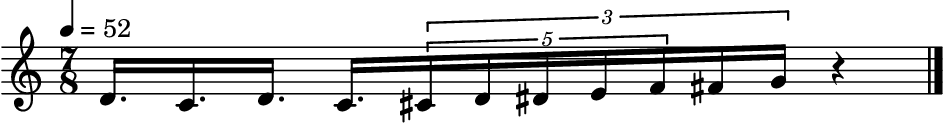

In [2]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    
    makeNote(61, F(2, 3)*F(1, 5)),
    makeNote(62, F(2, 3)*F(1, 5)),
    makeNote(63, F(2, 3)*F(1, 5)),
    makeNote(64, F(2, 3)*F(1, 5)),
    makeNote(65, F(2, 3)*F(1, 5)),
    makeNote(66, F(2, 3)*F(1, 4)),
    makeNote(67, F(2, 3)*F(1, 4)), 
    
]

struct = ScoreStruct(timesig='7/8', tempo=52)
struct = ScoreStruct(r'''
7/8(2-3-2), 52
7/8
''')
struct.dump()
part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 9.1ms)


error,div,snapped,slots,info
0.0030,"(1, 1, 3)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D~ 0.889:1 1/9♩»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0040,"(9,)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D~ 0.889:1 1/9♩»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1008,"(8,)","[«4C 0:0.625 5/8♩», «4C# 0.625:0.875 1/4♩», «4D~ 0.875:1 1/8♩»]","[0, 5, 7]","gridError=0.1, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1100,"(6,)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.833 1/6♩», «4D~ 0.833:1 1/6♩»]","[0, 4, 5]","gridError=0.11, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2270,"(5,)","[«4C 0:0.6 3/5♩», «4C# 0.6:0.8 1/5♩», «4D~ 0.8:1 1/5♩»]","[0, 3, 4]","gridError=0.227, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 7.9ms)


error,div,snapped,slots,info
0.0030,"(3, 1, 1)","[«~4D 0:0.111 1/9♩», «4D# 0.111:0.333 2/9♩», «4E 0.333:1 2/3♩»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0040,"(9,)","[«~4D 0:0.111 1/9♩», «4D# 0.111:0.333 2/9♩», «4E 0.333:1 2/3♩»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1008,"(8,)","[«~4D 0:0.125 1/8♩», «4D# 0.125:0.375 1/4♩», «4E 0.375:1 5/8♩»]","[0, 1, 3]","gridError=0.1, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1100,"(6,)","[«~4D 0:0.167 1/6♩», «4D# 0.167:0.333 1/6♩», «4E 0.333:1 2/3♩»]","[0, 1, 2]","gridError=0.11, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2270,"(5,)","[«~4D 0:0.2 1/5♩», «4D# 0.2:0.4 1/5♩», «4E 0.4:1 3/5♩»]","[0, 1, 2]","gridError=0.227, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



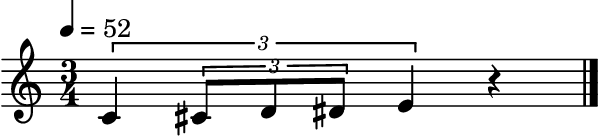

In [3]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3)),
    makeNote(61, F(2, 9)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(2, 9)),
    makeNote(64, F(2, 3)),
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 10.2ms)


error,div,snapped,slots,info
0.0030,"(1, 1, 3)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D~ 0.889:1 1/9♩»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0040,"(9,)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D~ 0.889:1 1/9♩»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1008,"(8,)","[«4C 0:0.625 5/8♩», «4C# 0.625:0.875 1/4♩», «4D~ 0.875:1 1/8♩»]","[0, 5, 7]","gridError=0.1, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1100,"(6,)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.833 1/6♩», «4D~ 0.833:1 1/6♩»]","[0, 4, 5]","gridError=0.11, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2270,"(5,)","[«4C 0:0.6 3/5♩», «4C# 0.6:0.8 1/5♩», «4D~ 0.8:1 1/5♩»]","[0, 3, 4]","gridError=0.227, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 7.7ms)


error,div,snapped,slots,info
0.0030,"(3, 1, 1)","[«~4D 0:0.111 1/9♩», «4D# 0.111:0.222 1/9♩», «4E 0.222:0.333 1/9♩», «4F 0.333:1 2/3♩»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0040,"(9,)","[«~4D 0:0.111 1/9♩», «4D# 0.111:0.222 1/9♩», «4E 0.222:0.333 1/9♩», «4F 0.333:1 2/3♩»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1309,"(8,)","[«~4D 0:0.125 1/8♩», «4D# 0.125:0.25 1/8♩», «4E 0.25:0.375 1/8♩», «4F 0.375:1 5/8♩»]","[0, 1, 2, 3]","gridError=0.131, rhythmComplexity=0.224 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1641,"(6,)","[«~4D 0:0.167 1/6♩», «4D# 0.167:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 9)}», «4E 0.167:0.333 1/6♩», «4F 0.333:1 2/3♩»]","[0, 1, 1, 2]","gridError=0.164, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2514,"(5,)","[«~4D 0:0.2 1/5♩», «4D# 0.2:grace properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 9)}», «4E 0.2:0.4 1/5♩», «4F 0.4:1 3/5♩»]","[0, 1, 1, 2]","gridError=0.251, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



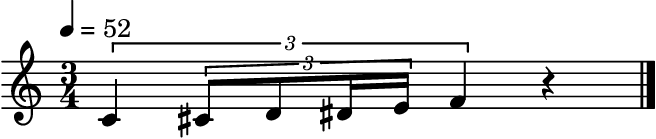

In [4]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3)),
    makeNote(61, F(2, 9)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(1, 9)),
    makeNote(64, F(1, 9)),
    
    makeNote(65, F(2, 3)),
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 600.8µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«rest 0:0.333 1/3♩», «4C 0.333:1 2/3♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1285,"(5,)","[«rest 0:0.4 2/5♩», «4C 0.4:1 3/5♩»]","[0, 2]","gridError=0.128, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 8.8ms)


error,div,snapped,slots,info
0.0030,"(1, 1, 3)","[«4C# 0:0.667 2/3♩», «4D 0.667:0.889 2/9♩», «4D# 0.889:1 1/9♩»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0040,"(9,)","[«4C# 0:0.667 2/3♩», «4D 0.667:0.889 2/9♩», «4D# 0.889:1 1/9♩»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1008,"(8,)","[«4C# 0:0.625 5/8♩», «4D 0.625:0.875 1/4♩», «4D# 0.875:1 1/8♩»]","[0, 5, 7]","gridError=0.1, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1100,"(6,)","[«4C# 0:0.667 2/3♩», «4D 0.667:0.833 1/6♩», «4D# 0.833:1 1/6♩»]","[0, 4, 5]","gridError=0.11, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2270,"(5,)","[«4C# 0:0.6 3/5♩», «4D 0.6:0.8 1/5♩», «4D# 0.8:1 1/5♩»]","[0, 3, 4]","gridError=0.227, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Best 5 divisions: (quantized in 6.4ms)


error,div,snapped,slots,info
0.0040,"(9,)","[«4E 0:0.111 1/9♩», «rest 0.111:1 8/9♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0270,"(8,)","[«4E 0:0.125 1/8♩», «rest 0.125:1 7/8♩»]","[0, 1]","gridError=0.0269, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0544,"(7,)","[«4E 0:0.143 1/7♩», «rest 0.143:1 6/7♩»]","[0, 1]","gridError=0.0544, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0886,"(6,)","[«4E 0:0.167 1/6♩», «rest 0.167:1 5/6♩»]","[0, 1]","gridError=0.0875, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1305,"(5,)","[«4E 0:0.2 1/5♩», «rest 0.2:1 4/5♩»]","[0, 1]","gridError=0.13, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



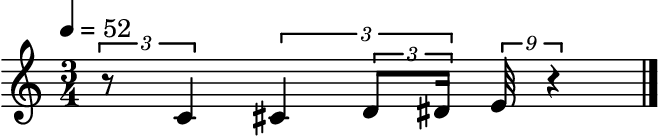

In [5]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3), offset=F(1, 3)),
    makeNote(61, F(2, 3)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(1, 9)),
    makeNote(64, F(1, 9)),
    
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
#quantprofile.maxGridDensity = 32
#quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')